In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt

class Plotgap:
    Data = ["qap10/", "qap15/", "nug08-3rd/", "nug20/"]
    method = ["PDHG/", "EGM/", "ADMM/"]
    cachepath = "cache/"
    cachesuffix = ".txt"
    datapath = "data/"
    datasuffix = ".mps"
    marker = ['o','v','^','<',None]
    color = ["#324a9d","#780f70",'#057f0c','#db3421','black']
    fixed_length = [-1,1024,256,64,-1] 
    labels = ["Adaptive restarts",
            "fixed_restarts_1024",
            "fixed_restarts_256",
            "fixed_restarts_64",
            "No restarts"]
    
    def __init__(self,methodidx,dataidx):
        self.usemethod = self.method[methodidx]
        self.usedata = self.Data[dataidx]
        self.usecache = self.cachepath + self.usemethod + self.usedata
        self.files = [f for f in os.listdir(self.usecache) if not f.endswith("idx.txt")]
        self.idxfile = [f for f in os.listdir(self.usecache) if f.endswith("idx.txt")][0]
        self.adaptive_restart_idx=np.loadtxt(self.usecache+self.idxfile,dtype=int)
    
    def plot_gap(self, gap, record_every, plt_handle, marker,
            color,label,restart_length,idx=None):
        plt_handle.plot(
            np.arange(0, len(gap) * record_every, record_every),
            gap,
            linewidth=0.8,
            color=color,
            label=label
        )
        if idx is not None:
            plt_handle.scatter(
                np.arange(0, len(gap) * record_every, record_every)[idx//30-1],
                gap[idx//30-1],
                marker=marker,
                s=12,
                color=color
            )
        if restart_length !=-1:
            # fixed_restart_idx=np.arange(0, len(gap) * record_every, record_every)[restart_length]
            # plt_handle.scatter(
            #     np.arange(0, len(gap) * record_every, record_every)[restart_length],
            #     gap[restart_length],
            #     marker=marker,
            #     color=color,
            # )
            pass

        plt_handle.set_xlabel("iteration")
        plt_handle.set_ylabel("normalized duality gap")
        plt_handle.set_yscale("log")

        return

    def plot(self):
        fig, ax = plt.subplots()
        fig.set_dpi(1200)
        ax.set_xlim(0,10000)
        ax.set_ylim(1e-7,1e1)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        for i,filename in enumerate(self.files):
            filepath = os.path.join(self.usecache, filename)
            cache = np.loadtxt(filepath,delimiter=',')
            gap = np.abs(cache[:,0])
            kkt_error = cache[:,1]
            if i==0:
                self.plot_gap(gap,30,ax,self.marker[i],self.color[i],
                         self.labels[i],-1,self.adaptive_restart_idx)
            else:
                self.plot_gap(gap,30,ax,self.marker[i],self.color[i],
                         self.labels[i],self.fixed_length[i])

        ax.legend(loc='upper right')
        plt.show()
        fig.savefig('fig/'+self.usemethod+self.usedata.strip('/')+'.png',bbox_inches='tight')

        print(self.files)        
        print(self.adaptive_restart_idx)
        
        return 



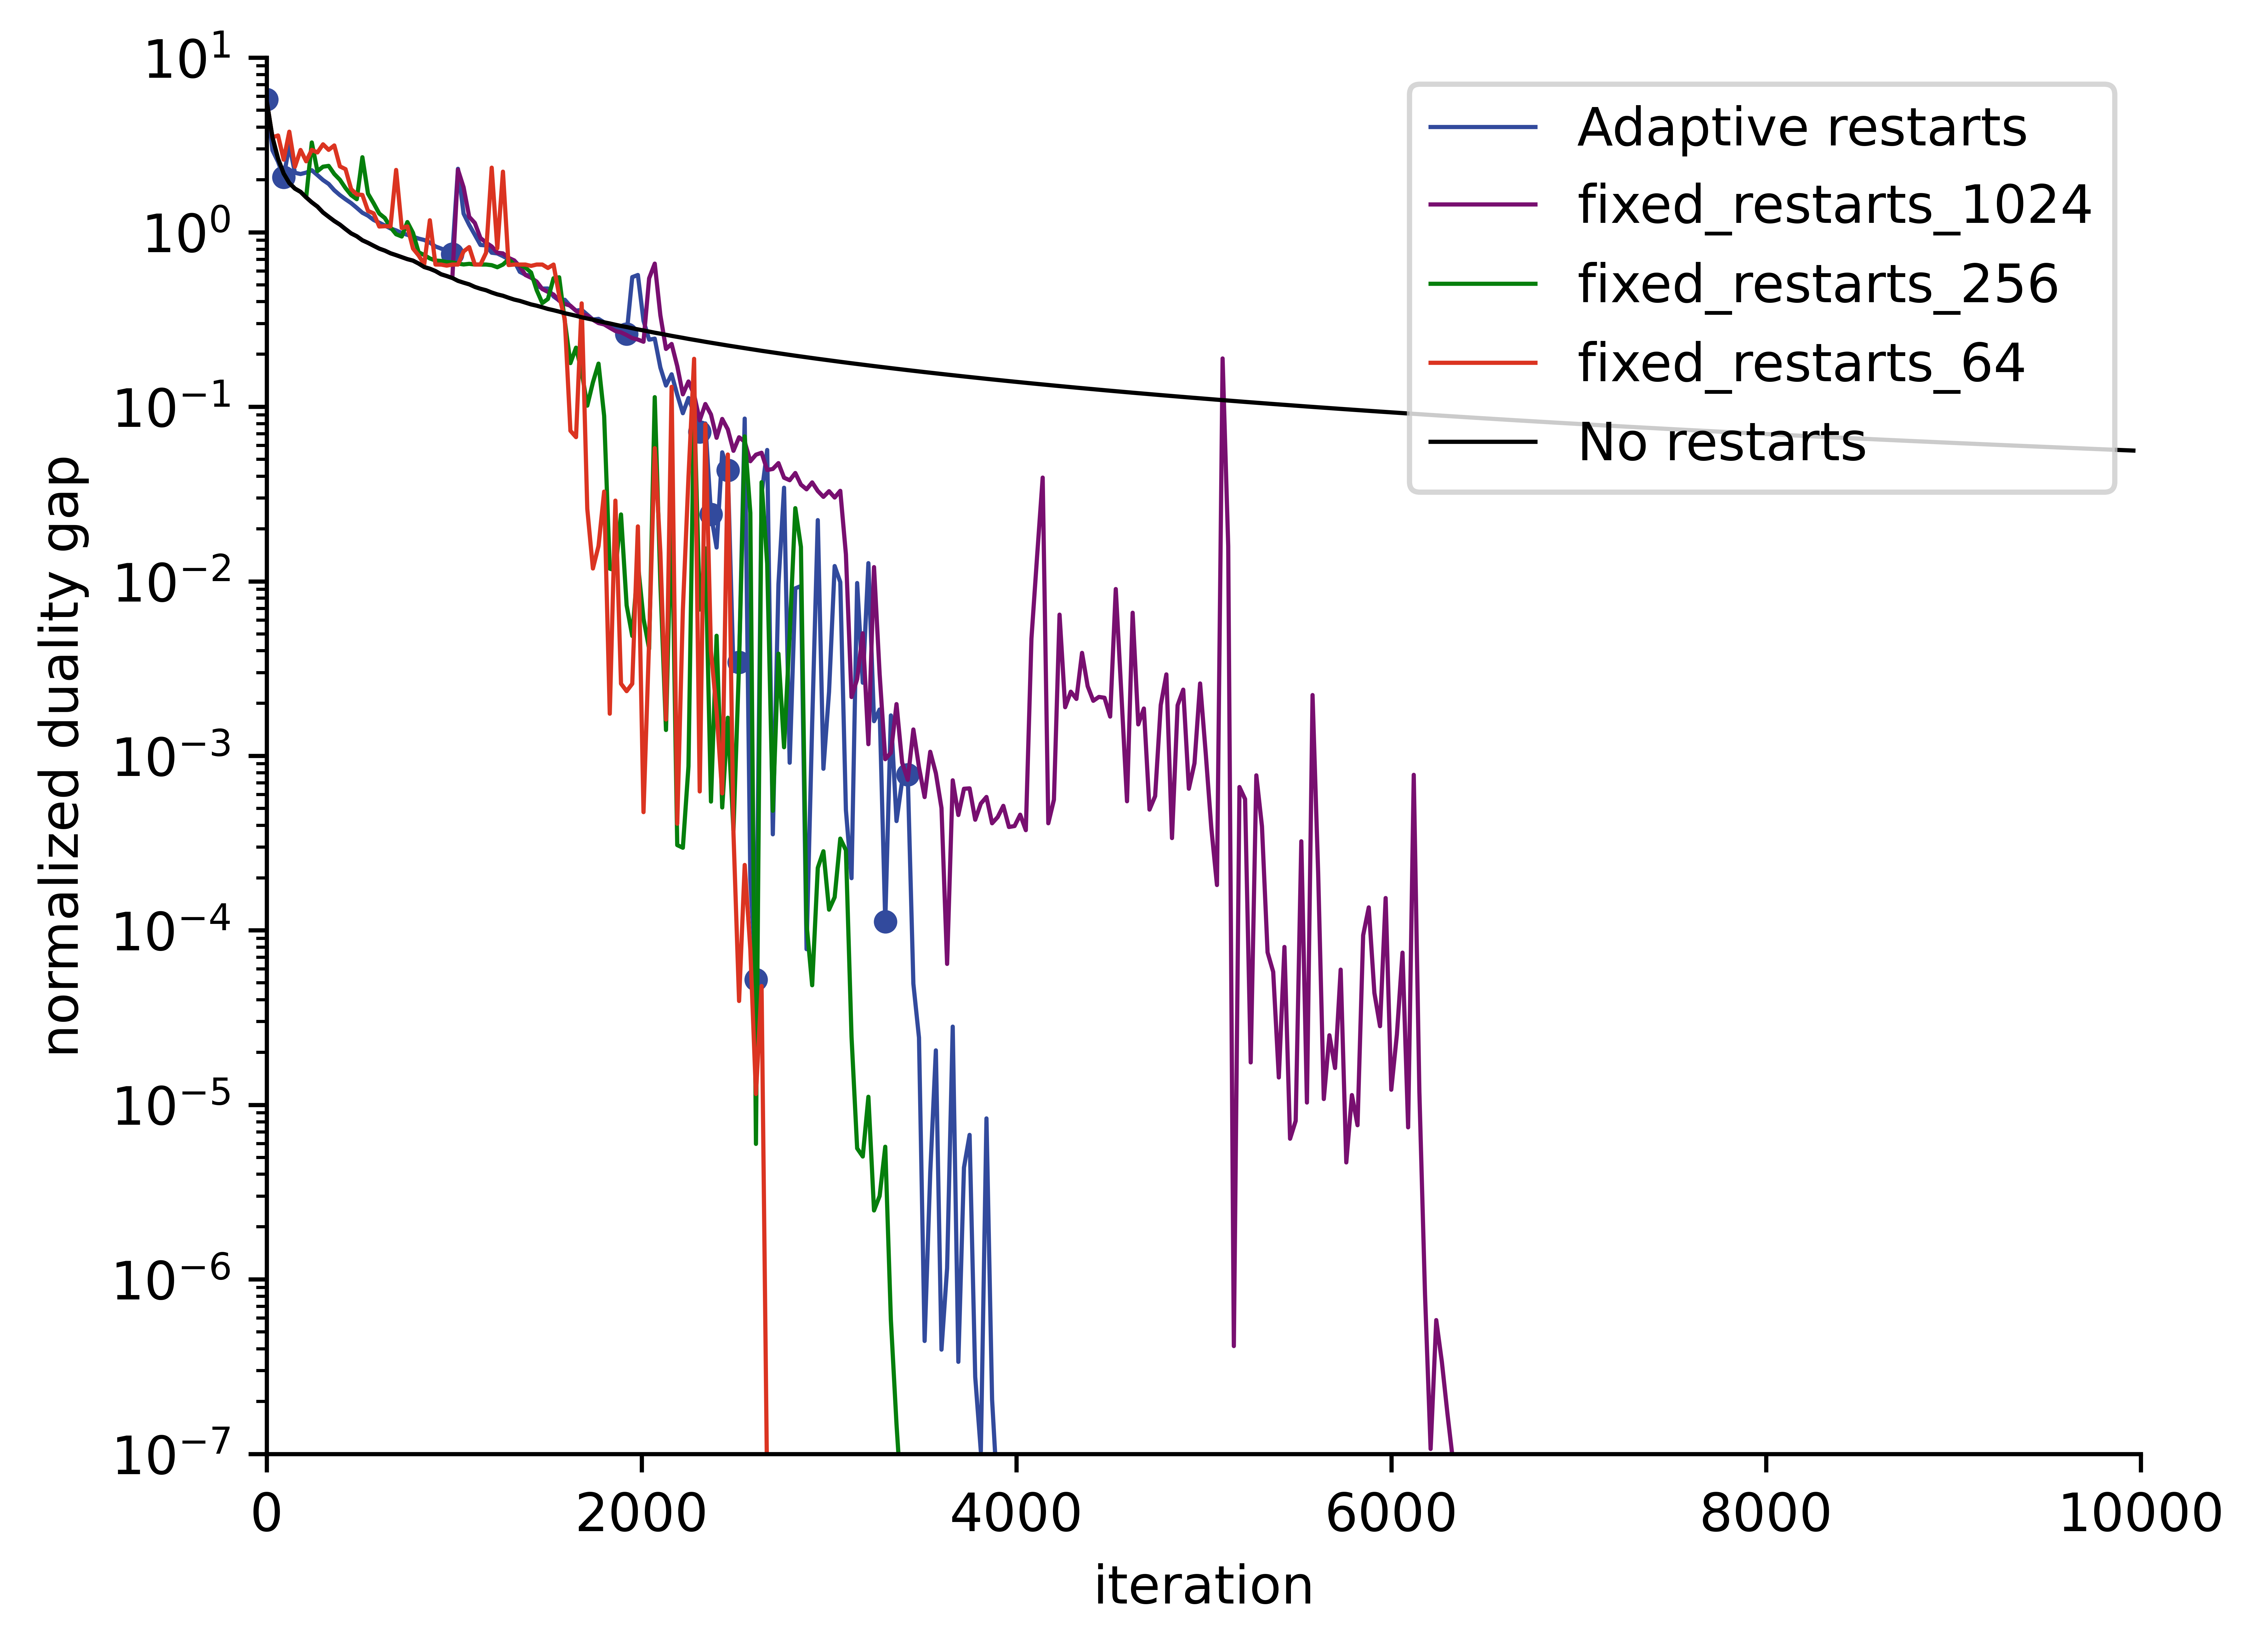

['adaptive_restarts.txt', 'fixed_restarts_1024.txt', 'fixed_restarts_256.txt', 'fixed_restarts_64.txt', 'no_restarts.txt']
[  30  120 1020 1950 2340 2400 2490 2550 2640 3330 3450]


In [15]:
Plotgap(0,2).plot()